# Steps Analysis (02/17/17 - 10/24/18)

In [258]:
from main_steps_clean_function import main_clean_function
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup

HKQuantityTypeIdentifierFlightsClimbed
HKQuantityTypeIdentifierDistanceWalkingRunning

 Record type="HKQuantityTypeIdentifierDistanceWalkingRunning" 
 sourceName="iPhone" 
 sourceVersion="11.2.6" 
 device="&lt;&lt;HKDevice: 0x281267f70&gt;, 
 name:iPhone, 
 manufacturer:Apple, 
 model:iPhone, 
 hardware:iPhone9,2, 
 software:11.2.6&gt;" 
 unit="mi" 
 creationDate="2018-03-07 18:34:46 -0700" 
 startDate="2018-03-07 17:28:41 -0700" 
 endDate="2018-03-07 17:35:24 -0700" 
 value="0.00352939"/

In [259]:
df = main_clean_function('./data/export.xml')

Total Rows = 27660
Total Steps = 4952676
start_date != end_date: 139
Total Rows = 27801
Total Steps = 4952676.0
start_date != end_date: 0
Total Rows = 24904
Total Steps = 4599229.0
start_date != end_date: 0
Total Rows = 24901
Total Steps = 4316374.0
start_date != end_date: 0
Total Rows = 24900
Total Steps = 4316358.0
start_date != end_date: 0


In [255]:
df.columns

Index(['start_date', 'start_time', 'end_date', 'end_time', 'num_steps',
       'duration', 'source'],
      dtype='object')

In [257]:
summed_df = create_daily_steps_df(df)

In [219]:
summed_df.head()

,start_date,end_date,num_steps
0,2017-02-17,2017-02-17,812.0
1,2017-02-18,2017-02-18,2668.0
2,2017-02-19,2017-02-19,2991.0
3,2017-02-20,2017-02-20,2812.0
4,2017-02-21,2017-02-21,2819.0


In [220]:
def drop_change_rename_df(df, x, col_rnm):
    df.drop(df.index[list(range(x-1))], inplace=True)
    df.reset_index(inplace=True)
#     df.drop(columns=['index'], inplace=True)
    df.loc[:, 'start_date'] = df['end_date'] - pd.Timedelta(x, unit='D')
    df.rename(columns={'num_steps': col_rnm+'num_steps'}, inplace=True)
    if 'index' in df.columns:
        df.drop(columns=['index'], inplace=True)
    df.set_index(['start_date', 'end_date'], inplace=True)
    return df

In [229]:
def rolling_day_df(df, x):
    df.set_index(['start_date', 'end_date'], inplace=True)

    m_df = df.rolling(x).mean()
    m_df.reset_index(inplace=True)

    md_df = df.rolling(x).median()
    md_df.reset_index(inplace=True)

    std_df = df.rolling(x).std()
    std_df.reset_index(inplace=True)

    s_df = df.rolling(x).sum()
    s_df.reset_index(inplace=True)

    min_df = df.rolling(x).min()
    min_df.reset_index(inplace=True)

    max_df = df.rolling(x).max()
    max_df.reset_index(inplace=True)

    m_df = drop_change_rename_df(m_df, x, 'mean_')
    md_df = drop_change_rename_df(md_df, x, 'median_')
    merged_df_uno = pd.merge(m_df, md_df, on=m_df.index)

    std_df = drop_change_rename_df(std_df, x, 'std_')
    s_df = drop_change_rename_df(s_df, x, 'total_')
    merged_df_dos = pd.merge(std_df, s_df, on=std_df.index)

    min_df = drop_change_rename_df(min_df, x, 'min_')
    max_df = drop_change_rename_df(max_df, x, 'max_')
    merged_df_tres = pd.merge(min_df, max_df, on=min_df.index)

    merged_df_quatro = pd.merge(merged_df_uno, merged_df_dos, 
                                on=merged_df_uno.index)

    merged_df_finale = pd.merge(merged_df_quatro, merged_df_tres,
                                on=merged_df_tres.index)

    merged_df_finale.drop(columns=['key_0_y'], inplace=True)

    merged_df_finale['steps_score_mean'] = merged_df_finale['mean_num_steps'] / \
        merged_df_finale['std_num_steps']

    merged_df_finale['steps_score_median'] = merged_df_finale['median_num_steps'] / \
        merged_df_finale['std_num_steps']

    merged_df_finale.reset_index(inplace=True)
    
    merged_df_finale.drop(columns=['index', 'key_0'], inplace=True)

    return merged_df_finale

In [230]:
roll_trenta = rolling_day_df(summed_df, 7)
summed_df.reset_index(inplace=True)
# summed_df.drop(columns=['index'], inplace=True)

In [231]:
roll_trenta.sort_values(by='total_num_steps', ascending=False)

,key_0_x,key_0_x,mean_num_steps,median_num_steps,std_num_steps,total_num_steps,min_num_steps,max_num_steps,steps_score_mean,steps_score_median
512,512,"(2018-07-14 00:00:00, 2018-07-21 00:00:00)",12403.571429,10919.0,2587.089733,86825.0,9364.0,15895.0,4.794411,4.220573
127,127,"(2017-06-23 00:00:00, 2017-06-30 00:00:00)",12276.000000,10020.0,5170.406754,85932.0,6972.0,19457.0,2.374281,1.937952
128,128,"(2017-06-24 00:00:00, 2017-07-01 00:00:00)",12181.714286,10020.0,5287.931029,85272.0,6312.0,19457.0,2.303683,1.894881
463,463,"(2018-05-26 00:00:00, 2018-06-02 00:00:00)",11831.714286,13561.0,4351.390342,82822.0,4791.0,16422.0,2.719065,3.116475
126,126,"(2017-06-22 00:00:00, 2017-06-29 00:00:00)",11706.428571,10020.0,5876.333745,81945.0,4130.0,19457.0,1.992131,1.705145
511,511,"(2018-07-13 00:00:00, 2018-07-20 00:00:00)",11489.714286,10919.0,4361.233416,80428.0,2967.0,15895.0,2.634510,2.503650
129,129,"(2017-06-25 00:00:00, 2017-07-02 00:00:00)",11465.142857,8265.0,5930.507832,80256.0,5004.0,19457.0,1.933248,1.393641
607,607,"(2018-10-17 00:00:00, 2018-10-24 00:00:00)",11393.285714,9910.0,2984.477940,79753.0,8396.0,15580.0,3.817514,3.320514
461,461,"(2018-05-24 00:00:00, 2018-05-31 00:00:00)",11345.285714,12791.0,4091.661183,79417.0,4791.0,16422.0,2.772782,3.126114
605,605,"(2018-10-15 00:00:00, 2018-10-22 00:00:00)",11297.714286,9910.0,3567.078857,79084.0,6578.0,15580.0,3.167217,2.778184


In [232]:
summed_df.reset_index(inplace=True)
summed_df.drop(columns=['index'], inplace=True)
summed_df.groupby(summed_df['start_date'].dt.strftime('%b%y'), sort=False).mean()

,num_steps
start_date,
Feb17,2813.666667
Mar17,3263.129032
Apr17,3880.266667
May17,3285.774194
Jun17,6418.233333
Jul17,5750.516129
Aug17,4210.096774
Sep17,5991.379310
Oct17,7442.451613


In [233]:
summed_df

,start_date,end_date,num_steps
0,2017-02-17,2017-02-17,812.0
1,2017-02-18,2017-02-18,2668.0
2,2017-02-19,2017-02-19,2991.0
3,2017-02-20,2017-02-20,2812.0
4,2017-02-21,2017-02-21,2819.0
5,2017-02-22,2017-02-22,2559.0
6,2017-02-23,2017-02-23,4396.0
7,2017-02-24,2017-02-24,3060.0
8,2017-02-25,2017-02-25,5439.0
9,2017-02-26,2017-02-26,1592.0


In [234]:
summed_df.num_steps.std()

3417.714769297332

In [235]:
print_remainder(df)

Total Rows = 24900
Total Steps = 4316358.0
start_date != end_date: 0


In [236]:
X = summed_df.start_date.values
y = df.num_steps.values
type(y)

numpy.ndarray

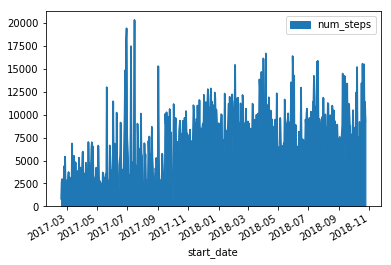

In [237]:
summed_df.plot(x='start_date', y='num_steps', kind='area')